<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# ASSIGNMENT
# DECISION TREES AND RANDOM FOREST

Exploring publicly available data from __LendingClub.com__. Lending Club connects people who need money __(borrowers)__ with people who have money __(investors)__.I am trying to create a model that will help predict people who have a profile of having a __high probability of paying back__.

Lending club had a very interesting year in __2016__. This data is from _before they even went public_.

I'm using lending data from __2007-2010__ and trying to classify and predict whether or not the borrower paid back their loan in full. The data is downloaded from here

Here are what the columns represent:
- __credit.policy:__ 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- __purpose:__ The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
- __int.rate:__ The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- __installment:__ The monthly installments owed by the borrower if the loan is funded.
- __log.annual.inc:__ The natural log of the self-reported annual income of the borrower.
- __dti:__ The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- __fico:__ The FICO credit score of the borrower.
- __days.with.cr.line:__ The number of days the borrower has had a credit line.
- __revol.bal:__ The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- __revol.util:__ The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- __inq.last.6mths:__ The borrower's number of inquiries by creditors in the last 6 months.
- __delinq.2yrs:__ The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- __pub.rec:__ The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

### Load the data

In [1]:
import pandas as pd
loans = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Check the columns present in dataset

In [2]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

### Check the shape of dataset

In [3]:
loans.shape

(9578, 14)

### Check the descriptive statistics of dataset

In [5]:
loans.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


### Check the info of the dataset

In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Q 1. Write a code to check if there is any missing values present in the dataset.

In [7]:
def tree():
    print(loans.isnull().sum())
    return #your code to check the missing values
tree()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


### Data Visualisation

### Q 2. Plot a histogram of two FICO distribution on top of each other, one for each credit.policy

In [8]:
loans[loans['credit.policy']==1]['fico']

0       737
1       707
2       682
3       712
4       667
       ... 
7705    742
7706    697
7707    737
7708    717
7709    757
Name: fico, Length: 7710, dtype: int64

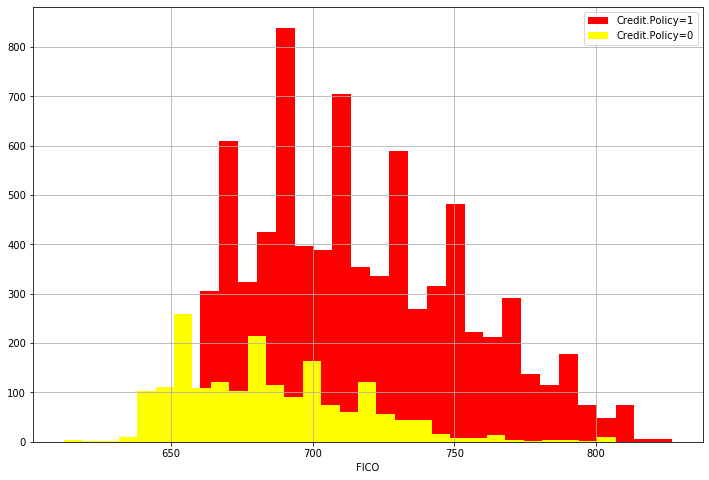

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
def tree():
    # set plot figure size
    plt.figure(figsize=(12,8))
    # code to create histogram for Credit.Policy=1 having alpha = 0.5, bins=30 and provide proper label
    loans[loans['credit.policy']==1]['fico'].hist(bins=30,alpha=1,color='red',label='Credit.Policy=1')                                      
    # code to create histogram for Credit.Policy=0 having alpha = 0.5, bins=30 and provide proper label
    loans[loans['credit.policy']==0]['fico'].hist(bins=30,alpha=1,color='yellow',label='Credit.Policy=0')                                            
    # provide legend
    # provide xlabel
    plt.legend()
    plt.xlabel('FICO')
    plt.show()
tree()

### Q 3. Plot a histogram of two FICO distribution on top of each other, one for each not.fully.paid

In [10]:
loans[loans['not.fully.paid']==1]['fico']

6       667
7       722
57      682
65      687
73      677
       ... 
9573    672
9574    722
9575    687
9576    692
9577    732
Name: fico, Length: 1533, dtype: int64

In [11]:
loans[loans['not.fully.paid']==0]['fico']

0       737
1       707
2       682
3       712
4       667
       ... 
9561    722
9562    717
9564    687
9567    687
9568    667
Name: fico, Length: 8045, dtype: int64

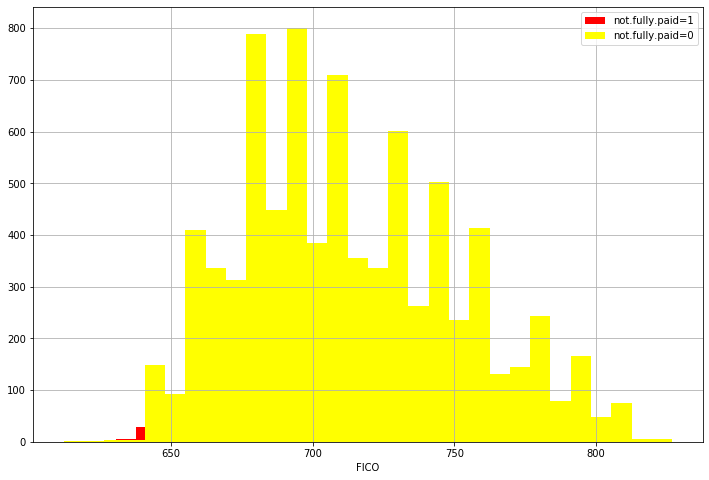

In [12]:
import matplotlib.pyplot as plt
def tree():
    plt.figure(figsize=(12,8))
    # code to create histogram for not.fully.paid=1 having alpha = 0.5, bins=30 and provide proper label
    loans[loans['not.fully.paid']==1]['fico'].hist(bins=30,alpha=1,color='red',label='not.fully.paid=1')                                      
    # code to create histogram for not.fully.paid=0 having alpha = 0.5, bins=30 and provide proper label
    loans[loans['not.fully.paid']==0]['fico'].hist(bins=30,alpha=1,color='yellow',label='not.fully.paid=0')                                            
    # provide legend
    # provide xlabel
    plt.legend()
    plt.xlabel('FICO')
    plt.show()
tree()

### Q 4. Using seaborn countplot show the counts of loans by purpose, with the color hue defined by not.fully.paid

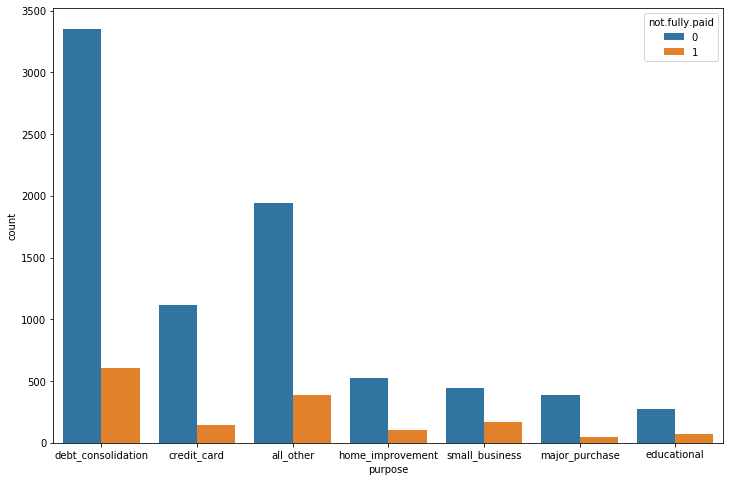

In [13]:
import seaborn as sns
def tree():
    # set plot figure size
    plt.figure(figsize=(12,8))
    # your code to create the countplot
    sns.countplot(x="purpose", hue="not.fully.paid", data=loans)
tree()

### Q. 5 Using a seaborn countplot understand the trend between FICO score and interest rate

In [14]:
loans["int.rate"]

0       0.1189
1       0.1071
2       0.1357
3       0.1008
4       0.1426
         ...  
9573    0.1461
9574    0.1253
9575    0.1071
9576    0.1600
9577    0.1392
Name: int.rate, Length: 9578, dtype: float64

In [15]:
loans["fico"]

0       737
1       707
2       682
3       712
4       667
       ... 
9573    672
9574    722
9575    687
9576    692
9577    732
Name: fico, Length: 9578, dtype: int64

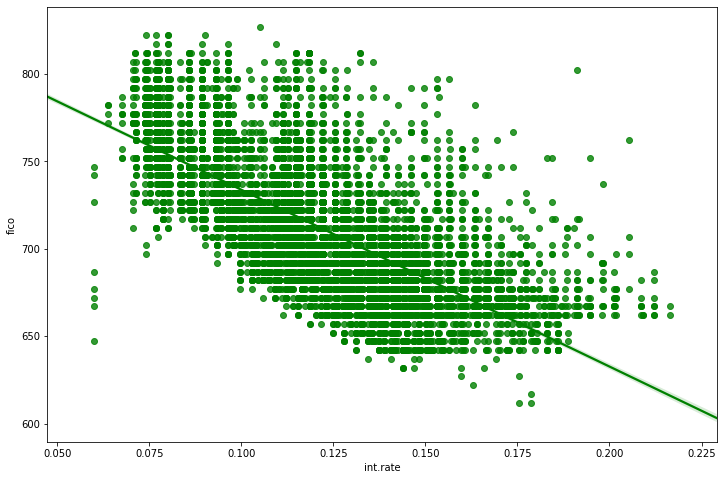

In [16]:
import seaborn as sns
def tree():
    # set plot figure size
    plt.figure(figsize=(12,8))
    # your code to create the countplot
    sns.regplot(data=loans,x="int.rate",y="fico", color='green')
tree()

### Dealing with categorical variables.
``` ['purpose'] ```
- The purpose column is categorical. so transform them using dummy variables using pd.get_dummies.

In [17]:
cat_feats = ['purpose']

In [18]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [19]:
loans=pd.get_dummies(loans, columns=['purpose'])

In [20]:
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


### Q 6. Using pd.get_dummies create a fixed larger dataframe that has new feature columns with dummy variables.

In [21]:
final_data = pd.DataFrame()
def tree():
    # create a new data frame final data with dummies of the categorical variables
    final_data=loans
    return final_data
final_data = tree()

In [22]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


### Q 7. Extract the independent column to prepare X

In [23]:
X = pd.DataFrame()
def tree():
    # create new dataframe X having all the independebt variables
    X=loans.loc[:,loans.columns!='not.fully.paid']
    return X#newly created dataframe
X = tree()
X.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


### Q 8. Extract dependent column into a dataframe y for model prediction

In [24]:
y = pd.DataFrame()
def tree():
     # create new dataframe y having the dependebt variable
    y=loans['not.fully.paid']
    return y#newly created dataframe
y = tree()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

### Q 9. Split X and y into train and test dataset

In [25]:
from sklearn.model_selection import train_test_split
def tree():
    return train_test_split(X,y,test_size=0.30, random_state=1)
    #using train_test_split, split the data into train and test in the ration 70:30 respectively.
X_train, X_test, y_train, y_test = tree()

In [26]:
X_train.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
8673,0,0.1324,60.86,10.348173,10.85,652,1169.958333,162,54.0,1,0,0,1,0,0,0,0,0,0
4496,1,0.1496,110.87,10.959540,20.43,672,5130.000000,6552,95.4,1,1,0,0,0,1,0,0,0,0
7659,1,0.1025,153.83,11.279732,20.42,712,6990.000000,61140,60.5,0,0,1,0,0,1,0,0,0,0
8836,0,0.1336,541.89,11.050890,16.69,702,4709.958333,19516,68.0,6,0,0,0,0,1,0,0,0,0
2198,1,0.0932,51.12,10.341742,19.21,727,4620.041667,714,10.1,3,0,1,1,0,0,0,0,0,0


In [27]:
X_test.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
8261,0,0.1513,451.48,11.264464,29.28,717,3330.000000,61057,80.7,3,0,0,0,0,1,0,0,0,0
3431,1,0.1537,871.16,11.925142,23.85,677,6419.958333,40741,50.3,3,0,0,0,0,0,0,0,1,0
5482,1,0.1357,509.53,11.302204,0.81,752,4770.000000,981,1.1,7,1,0,0,1,0,0,0,0,0
3272,1,0.1284,188.27,10.308953,2.08,687,4139.958333,3859,38.6,3,0,0,1,0,0,0,0,0,0
4687,1,0.1496,519.68,11.407565,24.99,687,3509.958333,53896,96.8,0,0,0,0,0,1,0,0,0,0


In [28]:
y_train.head()

8673    0
4496    0
7659    0
8836    1
2198    0
Name: not.fully.paid, dtype: int64

In [29]:
y_test.head()

8261    0
3431    1
5482    1
3272    1
4687    0
Name: not.fully.paid, dtype: int64

### Check the shape of X and y of train dataset

In [30]:
def tree():
    print(X_train.shape)
    print(y_train.shape)
tree()

(6704, 19)
(6704,)


### Check the shape of X and y of test dataset

In [31]:
def tree():
    print(X_test.shape)
    print(y_test.shape)
tree()

(2874, 19)
(2874,)


### Q 10. Instantiate Decision Tree Classifier using scikit learn

In [32]:
from sklearn.tree import DecisionTreeClassifier
def tree():
    # initate the DecisionTreeClasifier as dtree.
    dtree=DecisionTreeClassifier()
    return dtree
dtree = tree()

### Q 11. Fit the model on X_train and y_train

In [33]:
def tree():
    dtree.fit(X_train, y_train)
    return # the fitted model on X_train and y_train
tree()

### Q 12. Using the model for prediciton

In [34]:
predictions = pd.DataFrame()
def tree():
    # use the model for prediction and assign it to predictions
    predictions=dtree.predict(X_test)
    return predictions
predictions = tree()
predictions

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

### Q 13. Model evaluation using Confusion matrix.

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7282533054975644

In [36]:
from sklearn.metrics import confusion_matrix
#confusion_mat=pd.DataFrame()

confusion_mat=pd.DataFrame(confusion_matrix(y_test, predictions))
confusion_mat.index=["Actual not paid", "Actual paid"]
confusion_mat.columns=["Predicted not paid", "Predicted paid"]
    #COmpute and print the confusion matrix
#tree()

print(confusion_mat)

                 Predicted not paid  Predicted paid
Actual not paid                1995             402
Actual paid                     379              98


### Q 14. Model evaluation using recall score

In [37]:
from sklearn.metrics import recall_score
def log():
    # compute the recall score as recall1
    recall1 = recall_score(y_test,predictions)
    # your code to print the recall1 scoreprint('Recall score for test data is:', recall1)
    print('Recall score for test data is:', recall1)
    return recall1
recall1 = log()

Recall score for test data is: 0.20545073375262055


### Q 15. Model evaluation using classification report.
- Please refer the link for Classification report documentation - http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [40]:
from sklearn.metrics import classification_report
def tree():
    # COmpute and print the classification report
    print(classification_report(y_test,predictions))
tree()

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2397
           1       0.20      0.21      0.20       477

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.73      0.73      0.73      2874



### Q 16. Instantiate Decision Tree Classifer using sikit learn having (criterion='entropy', max_leaf_nodes=10, max_depth=3, min_samples_split=5, min_samples_leaf=4).
- Please refer the link for DecisionTreeClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [41]:
def tree():
    # instantiate Decision tree classifier as dtree1 with the above mentioned parameters
    dtree1=DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, max_depth=3, min_samples_split=5, min_samples_leaf=4)
    return dtree1
dtree1 = tree()
dtree1

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### 16.1 Fit the model X_train and y_train

In [42]:
def tree():
    dtree1.fit(X_train, y_train)
    return # the fitted model on X_train and y_train
tree()

### 16.2 Use the model for prediction

In [43]:
predictions_new = pd.DataFrame()
def tree():
    # use the model for prediction and assign it to predeictions_new
    predictions_new=dtree1.predict(X_test)
    return predictions_new
predictions_new = tree()

In [44]:
predictions_new

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### 16.3 Model evaluation using Confusion matrix

In [45]:
confusion_matnew=pd.DataFrame(confusion_matrix(y_test, predictions_new))
confusion_matnew.index=["Actual not paid", "Actual paid"]
confusion_matnew.columns=["Predicted not paid", "Predicted paid"]
print(confusion_matnew)

                 Predicted not paid  Predicted paid
Actual not paid                2397               0
Actual paid                     477               0


### 16.4 Model evaluation using recall score

In [47]:
from sklearn.metrics import recall_score
def log():
    # Compute the recall score as recall2
    recall2 = recall_score(y_test,predictions_new)
    # print the recall score for the recall2
    print("The recall score is ", recall2)
    return recall2
recall2 = log()

The recall score is  0.0


### 16.5 Model evaluation using classification report

In [48]:
def tree():
    # Compute and print the classification report
    print(classification_report(y_test,predictions_new))
tree()

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2397
           1       0.00      0.00      0.00       477

    accuracy                           0.83      2874
   macro avg       0.42      0.50      0.45      2874
weighted avg       0.70      0.83      0.76      2874



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Q 17. Write a code to find the difference between the recall score of 2 Decision Tree models created above ( Give the absolute value).

In [51]:
def log():
    # Compute the difference between recall1 and recall2
    print(abs(recall1-recall2))
    return # the difference value
log()

0.20545073375262055


## Random Forest Model

### Q 18. Instantiate Random Forest Classifier using scikit learn having n_estimators = 600.

In [52]:
from sklearn.ensemble import RandomForestClassifier
def rf():
    # instantiate the random forest classifier and assign it to rfc
    rfc = RandomForestClassifier()
    return rfc
rfc = rf()
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Q 19. Fit the model on X_train and y_train

In [53]:
def rf():
    rfc.fit(X_train, y_train)
    return # the fitted model on X_train and y_train
rf()

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Q 20. Using the model for prediction

In [54]:
predictions1 = pd.DataFrame()
def rf():
    # use the model for predictions and assign it to predictions1
    predictions1=rfc.predict(X_test)
    return predictions1
predictions1 = rf()
predictions1

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

### Q 21. Model evaluation using Confusion matrix 

In [55]:
# COmpute and print the confusion matrix
confusion_mat1=pd.DataFrame(confusion_matrix(y_test, predictions1))
confusion_mat1.index=["Actual not paid", "Actual paid"]
confusion_mat1.columns=["Predicted not paid", "Predicted paid"]
print(confusion_mat1)

                 Predicted not paid  Predicted paid
Actual not paid                2352              45
Actual paid                     452              25


### Q 22. Model evaluation using recall score

In [56]:
from sklearn.metrics import recall_score
def log():
    # Compute the recall score and assign it to recall_rfc
    recall_rfc = recall_score(y_test,predictions1)
    # print the recall_rfc
    return recall_rfc
recall_rfc = log()

In [57]:
recall_rfc

0.05241090146750524

### Q 23. Model evaluation using Classification report.

In [58]:
def rf():
    # Compute and print classification report
    print(classification_report(y_test,predictions1))
rf()

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2397
           1       0.36      0.05      0.09       477

    accuracy                           0.83      2874
   macro avg       0.60      0.52      0.50      2874
weighted avg       0.76      0.83      0.77      2874



### Q 24. Instantitate Random Forest Model using scikit learn having (criterion='entropy',n_estimators = 100, random_state = 0, max_depth = 2, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=5).
- Pleae refer the link for RandomForestClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [59]:
def rf():
    # instantiate the random forest classifier as rfc_new using all the parameters mentioned above
    rfc_new = RandomForestClassifier(criterion='entropy',n_estimators = 100, random_state = 0, max_depth = 2, 
                                     min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=5)
    return rfc_new
rfc_new = rf()
rfc_new

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=2, max_features='auto', max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### 24.1 Fit the model on X_train and y_train

In [60]:
def rf():
    rfc_new.fit(X_train, y_train)
    return # the fiited model on X_train and y_train
rf()

### 24.2 Using the model for prediction

In [61]:
new_predictions = pd.DataFrame()
def rf():
    # using the model for predictions and assign it to new_predictions
    new_predictions=rfc_new.predict(X_test)
    return new_predictions
new_predictions = rf()
new_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### 24.3 Model evaluation using Confusion Matrix

In [62]:

# Compute and print the confusion matrix
confusion_mat2=pd.DataFrame(confusion_matrix(y_test, new_predictions))
confusion_mat2.index=["Actual not paid", "Actual paid"]
confusion_mat2.columns=["Predicted not paid", "Predicted paid"]
confusion_mat2

,Predicted not paid,Predicted paid
Actual not paid,2397,0
Actual paid,477,0


### 24.4 Model evaluation using recall score

In [63]:
from sklearn.metrics import recall_score
def log():
    # Compute the recall_score as recall_rfc1
    recall_rfc1 = recall_score(y_test,new_predictions)
    # printt the recall score
    return recall_rfc1
recall_rfc1 = log()
recall_rfc1

0.0

### 24.5 Model evaluation using Classification report

In [64]:
def rf():
    # Compute and print the classification report
    print(classification_report(y_test,new_predictions))
rf()

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2397
           1       0.00      0.00      0.00       477

    accuracy                           0.83      2874
   macro avg       0.42      0.50      0.45      2874
weighted avg       0.70      0.83      0.76      2874



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Q 25. Write a code to understand the difference between the recall score of the above 2 Random Forest models (Give the absolute value).

In [65]:
def log():
    # Calculate the difference between recall_rfc and recall_rfc
    print(abs(recall_rfc-recall_rfc))
    return # the difference value
log()

0.0
